In [3]:
import pandas as pd
df=pd.read_csv('titanic_toy.csv')

In [4]:
df.sample(2)

,Age,Fare,Family,Survived
416,34.0,32.5000,2,1
69,26.0,8.6625,2,0


In [5]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [8]:
#incodeing data for missing value Simple imputing

In [19]:
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.compose import ColumnTransformer

In [20]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [24]:
x=df.drop(columns=['Survived'])
y=df['Survived']
y=pd.DataFrame(y)
print(type(x),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [35]:
x_train.isna().mean()

Age       0.199037
Fare      0.048154
Family    0.000000
dtype: float64

In [43]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()


In [45]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)

In [49]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
759,33.0,86.5,0,33.0,33.0,86.5000,86.500000
695,52.0,13.5,0,52.0,52.0,13.5000,13.500000
871,47.0,NaN,2,47.0,47.0,14.4542,31.798348
343,25.0,13.0,0,25.0,25.0,13.0000,13.000000
257,30.0,86.5,0,30.0,30.0,86.5000,86.500000


In [50]:
x_train.isna().sum()

Age            124
Fare            30
Family           0
Age_median       0
Age_mean         0
Fare_median      0
Fare_mean        0
dtype: int64

In [52]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['Age_median'].var())
print('Age Variance after mean imputation: ', x_train['Age_mean'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', x_train['Fare_mean'].var())

Original Age variable variance:  211.95188064643307
Age Variance after median imputation:  169.94984651902135
Age Variance after mean imputation:  169.69780797736954
Original Fare variable variance:  2666.9296723129796
Fare Variance after median imputation:  2552.1099348908224
Fare Variance after mean imputation:  2538.2996238091378


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 445 to 102
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          499 non-null    float64
 1   Fare         593 non-null    float64
 2   Family       623 non-null    int64  
 3   Age_median   623 non-null    float64
 4   Age_mean     623 non-null    float64
 5   Fare_median  623 non-null    float64
 6   Fare_mean    623 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 38.9 KB


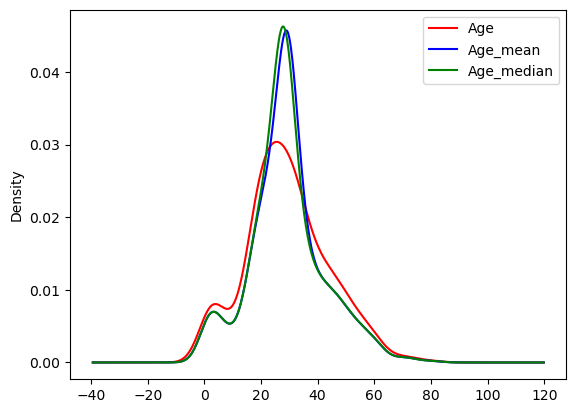

In [67]:
fig=plt.figure()
ax=fig.add_subplot(111)

x_train['Age'].plot(kind='kde',ax=ax,color='red')
x_train['Age_mean'].plot(kind='kde',ax=ax,color='blue')
x_train['Age_median'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, labels, loc='best')

In [68]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,211.951881,71.822073,-6.932603,211.951881,211.951881,65.775061,67.757268
Fare,71.822073,2666.929672,18.612474,59.765747,56.998513,2666.929672,2666.929672
Family,-6.932603,18.612474,2.997027,-5.533529,-5.550541,17.767537,17.714766
Age_median,211.951881,59.765747,-5.533529,169.949847,169.697808,55.227061,56.883154
Age_mean,211.951881,56.998513,-5.550541,169.697808,169.697808,52.662348,54.249388
Fare_median,65.775061,2666.929672,17.767537,55.227061,52.662348,2552.109935,2538.299624
Fare_mean,67.757268,2666.929672,17.714766,56.883154,54.249388,2538.299624,2538.299624


In [70]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.088197,-0.310167,1.000000,1.000000,0.083017,0.085804
Fare,0.088197,1.000000,0.205140,0.088616,0.084564,1.000000,1.000000
Family,-0.310167,0.205140,1.000000,-0.245186,-0.246123,0.203157,0.203104
Age_median,1.000000,0.088616,-0.245186,1.000000,0.999258,0.083857,0.086607
Age_mean,1.000000,0.084564,-0.246123,0.999258,1.000000,0.080023,0.082658
Fare_median,0.083017,1.000000,0.203157,0.083857,0.080023,1.000000,0.997291
Fare_mean,0.085804,1.000000,0.203104,0.086607,0.082658,0.997291,1.000000


<Axes: >

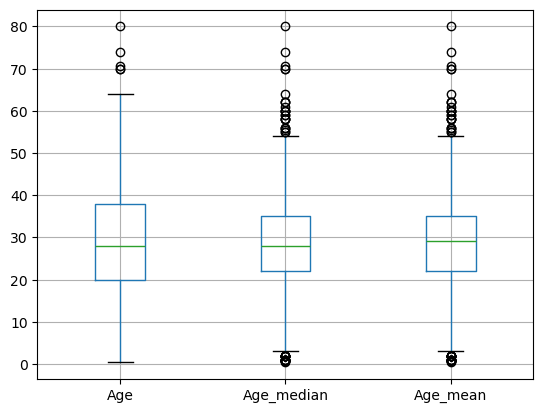

In [71]:
x_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

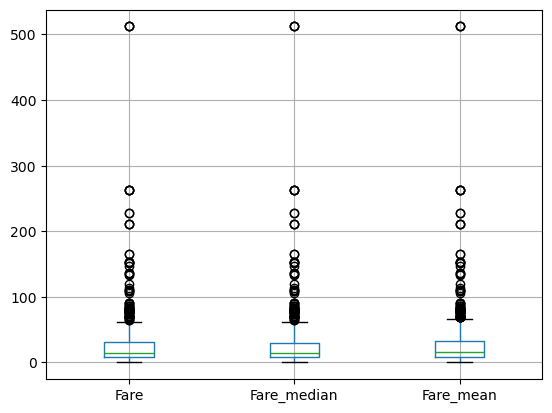

In [73]:
x_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# Simple mean ,median imputer is a used for only data which is less contataic


# example fare

In [76]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [78]:
from sklearn.impute import SimpleImputer

In [79]:
impu1=SimpleImputer(strategy='median')
impu2=SimpleImputer(strategy='mean')

In [80]:
from sklearn.compose import ColumnTransformer

In [87]:
trf=ColumnTransformer(
    [ 
    ('impu1',impu1,['Age']),
    ('impu2',impu2,['Fare'])
    ],
remainder='passthrough')

In [88]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impu1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('impu2', SimpleImputer(), ['Fare'])])

In [91]:
trf.named_transformers_['impu1'].statistics_

array([28.])

In [92]:
trf.named_transformers_['impu2'].statistics_

array([31.79834806])

In [93]:
x_train=trf.fit_transform(x_train)
x_test=trf.fit_transform(x_test)

# we have to always use train data mean and median for test data also